### Projeto - Análise e predição de desempenho de alunos para seu próximo emprego.

In [1]:
# Datas e Horas
from datetime import datetime

# Manipulação de Dados
import numpy as np
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-Processamento
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Processamento ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Avaliação de Desempenho
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Lendo dataset
campus = pd.read_csv('campus.csv')

# Primeiras linhas
campus.head(100)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
96,97,F,76.00,Central,70.00,Central,Science,76.00,Comm&Mgmt,Yes,66.00,Mkt&Fin,64.44,Placed,300000.0
97,98,F,70.50,Central,62.50,Others,Commerce,61.00,Comm&Mgmt,No,93.91,Mkt&Fin,69.03,Not Placed,NaN
98,99,F,69.00,Central,73.00,Central,Commerce,65.00,Comm&Mgmt,No,70.00,Mkt&Fin,57.31,Placed,220000.0


In [3]:
# Descrição
campus.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
# Avaliando dataset
campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
#Dimensão do Dataset
campus.shape

(215, 15)

In [6]:
#Verificando valores Nulos
campus.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
# Checando as colunas
campus.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [8]:
# Renomeando Colunas
campus.rename(
    columns={
        'sl_no' : 'serial', 
        'gender' : 'gênero', 
        'ssc_p' : 'ens_medio_p',
        'ssc_b' : 'conselho_em', 
        'hsc_p' : 'ens_tecnico_p', 
        'hsc_b' : 'conselho_et', 
        'hsc_s' : 'ens_medio_esp',
       'degree_p' : 'grau_p', 
       'degree_t' : 'grau_tipo', 
       'workex' : 'exp_trabalho', 
       'etest_p' : 'teste_emprego_p', 
       'specialisation' : 'especializacao', 
       'mba_p' : 'mba_p',
       'status' : 'status', 
       'salary' : 'salario'
    }, inplace=True
)

In [9]:
# Verificando alterações
campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial           215 non-null    int64  
 1   gênero           215 non-null    object 
 2   ens_medio_p      215 non-null    float64
 3   conselho_em      215 non-null    object 
 4   ens_tecnico_p    215 non-null    float64
 5   conselho_et      215 non-null    object 
 6   ens_medio_esp    215 non-null    object 
 7   grau_p           215 non-null    float64
 8   grau_tipo        215 non-null    object 
 9   exp_trabalho     215 non-null    object 
 10  teste_emprego_p  215 non-null    float64
 11  especializacao   215 non-null    object 
 12  mba_p            215 non-null    float64
 13  status           215 non-null    object 
 14  salario          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
campus.describe().T

,count,mean,std,min,25%,50%,75%,max
serial,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ens_medio_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
ens_tecnico_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
grau_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
teste_emprego_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salario,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [11]:
# Realizando a substituição de valores
campus['salario'].fillna(value=campus['salario'].median(), inplace=True)

##### Devido a quantidade de valores missing, os mesmos serão substituídos pela média..

In [12]:
# Removendo coluna Serial
campus = campus.drop(['serial'], axis=1)


In [13]:
campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gênero           215 non-null    object 
 1   ens_medio_p      215 non-null    float64
 2   conselho_em      215 non-null    object 
 3   ens_tecnico_p    215 non-null    float64
 4   conselho_et      215 non-null    object 
 5   ens_medio_esp    215 non-null    object 
 6   grau_p           215 non-null    float64
 7   grau_tipo        215 non-null    object 
 8   exp_trabalho     215 non-null    object 
 9   teste_emprego_p  215 non-null    float64
 10  especializacao   215 non-null    object 
 11  mba_p            215 non-null    float64
 12  status           215 non-null    object 
 13  salario          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


### Análise Exploratória de Dados


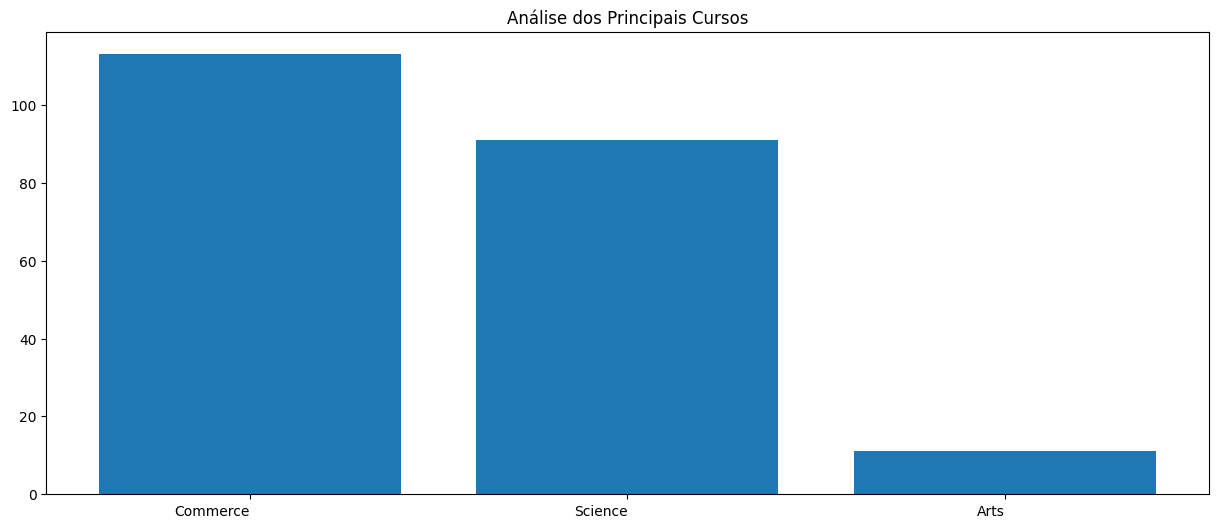

In [14]:
# Gráficos de Análise dos Setores
plt.figure(figsize=(15,6))
plt.title('Análise dos Principais Cursos')
plt.bar(campus['ens_medio_esp'].value_counts().index, campus['ens_medio_esp'].value_counts());
plt.xticks(ha='right');

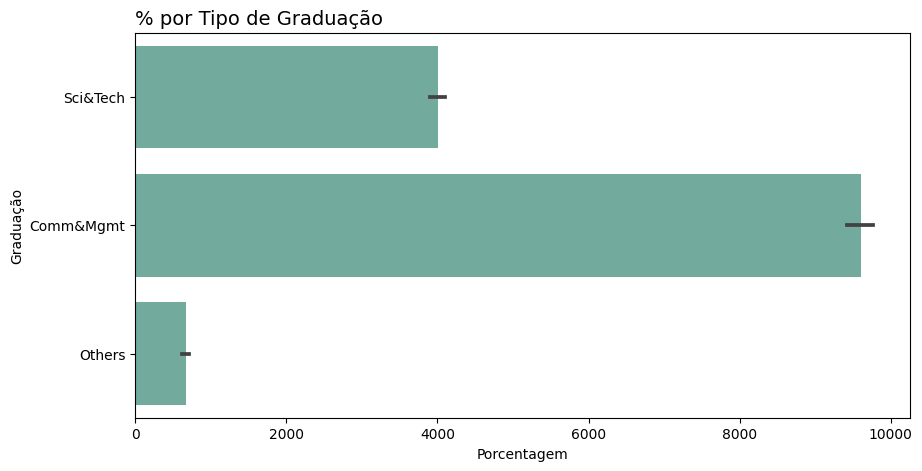

In [15]:
# Tamanho da imagem
plt.figure( figsize=(10, 5) )

# Titulo
plt.title('% por Tipo de Graduação', loc='left', fontsize=14 )

# Grafico
sns.barplot( data=campus, x='grau_p', y='grau_tipo',color='#69b3a2', estimator=sum )

# Label
plt.ylabel('Graduação');
plt.xlabel('Porcentagem');

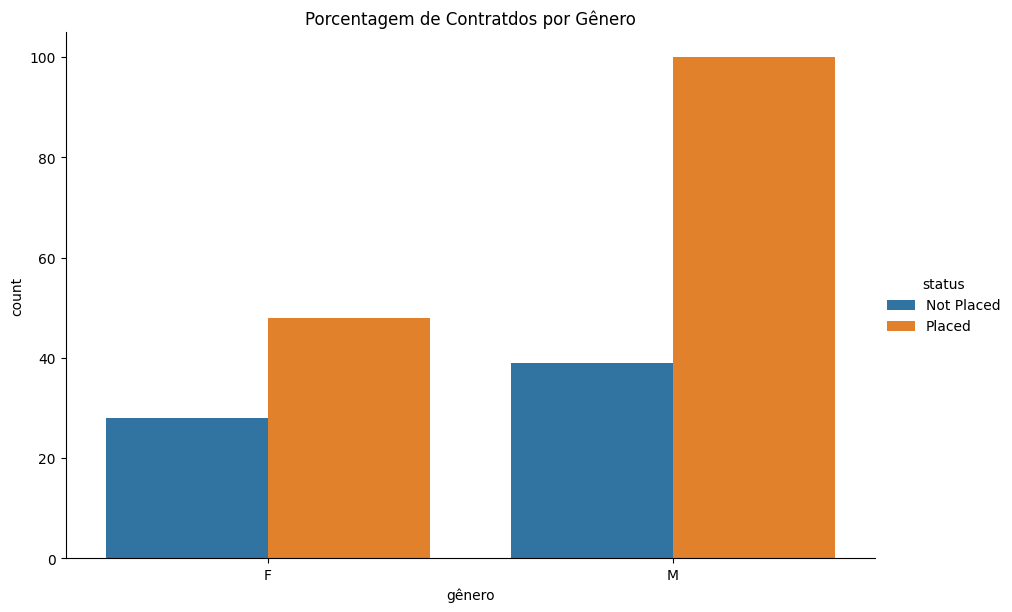

In [16]:
# Agrupe os dados por gênero e status e conte o número de ocorrências em cada grupo
dados_agrupados = campus.groupby(['gênero', 'status']).size().reset_index(name='count')

# Crie o gráfico de barras
sns.catplot(data=dados_agrupados, x='gênero', y='count', hue='status', kind='bar', palette=['#1f77b4', '#ff7f0e'], 
            height=6, aspect=1.5)
plt.title('Porcentagem de Contratdos por Gênero')
plt.show()

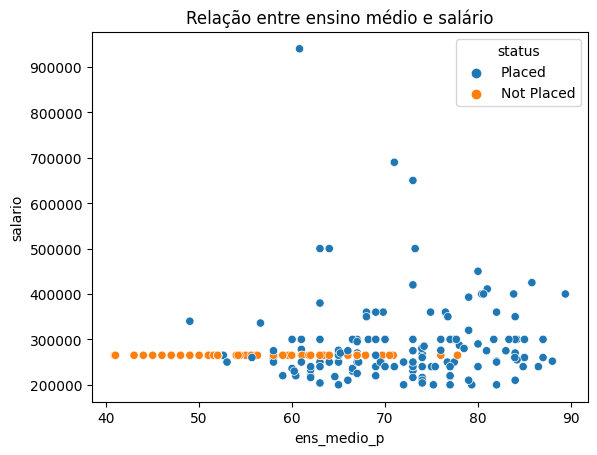

In [17]:
# Cria um gráfico de dispersão usando a biblioteca Seaborn
sns.scatterplot(data=campus, x='ens_medio_p', y='salario', hue='status')

# Adiciona um título ao gráfico
plt.title('Relação entre ensino médio e salário')

# Exibe o gráfico na tela
plt.show()

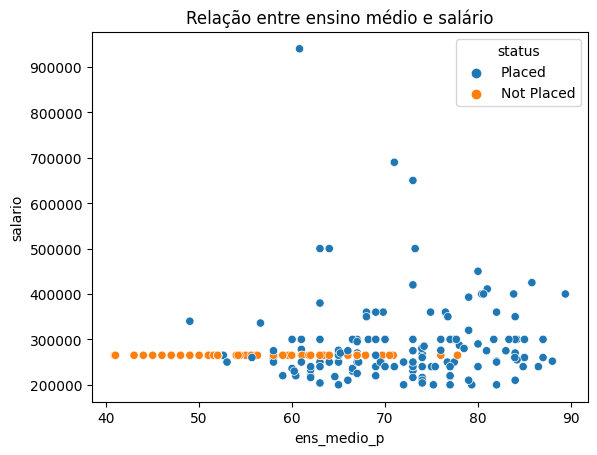

In [18]:
# Cria um gráfico de dispersão usando a biblioteca Seaborn
sns.scatterplot(data=campus, x='ens_medio_p', y='salario', hue='status')

# Adiciona um título ao gráfico
plt.title('Relação entre ensino médio e salário')

# Exibe o gráfico na tela
plt.show()

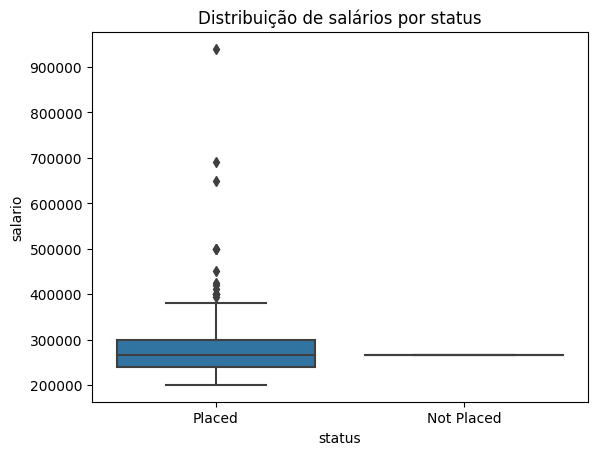

In [19]:
# Cria um boxplot usando a biblioteca Seaborn
sns.boxplot(data=campus, x='status', y='salario')

# Adiciona um título ao gráfico
plt.title('Distribuição de salários por status')

# Exibe o gráfico na tela
plt.show()

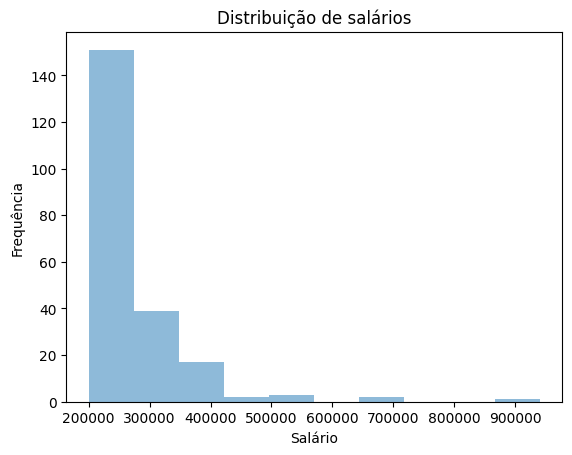

In [20]:
# Cria um histograma usando a biblioteca Matplotlib
plt.hist(campus['salario'], bins=10, alpha=0.5, color='#1f77b4')

# Adiciona um rótulo ao eixo x
plt.xlabel('Salário')

# Adiciona um rótulo ao eixo y
plt.ylabel('Frequência')

# Adiciona um título ao gráfico
plt.title('Distribuição de salários')

# Exibe o gráfico na tela
plt.show()

### Pré-processamentos dos Dados

In [21]:
campus.memory_usage(deep=True)

Index                128
gênero             12470
ens_medio_p         1720
conselho_em        13661
ens_tecnico_p       1720
conselho_et        13629
ens_medio_esp      13840
grau_p              1720
grau_tipo          14098
exp_trabalho       12759
teste_emprego_p     1720
especializacao     13665
mba_p               1720
status             13813
salario             1720
dtype: int64

In [22]:
# Converter coluna Gênero
campus['gênero'] = campus.gênero.astype('category')

In [23]:
cat_cols = [col for col in campus.columns if campus[col].dtype=='O']
cat_cols

['conselho_em',
 'conselho_et',
 'ens_medio_esp',
 'grau_tipo',
 'exp_trabalho',
 'especializacao',
 'status']

In [24]:
for col in cat_cols:
    print(campus[col].unique())

['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [25]:
for col in cat_cols:
    campus[col] = campus[col].astype('category')

In [26]:
y = campus.especializacao
features = ['ens_medio_p', 'ens_tecnico_p', 'ens_medio_esp', 'grau_p', 'grau_tipo', 'exp_trabalho', 'teste_emprego_p', 'especializacao', 'status', 'mba_p' ]

X = campus[features]

X.describe()

,ens_medio_p,ens_tecnico_p,grau_p,teste_emprego_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [27]:
from sklearn.preprocessing import LabelEncoder

features = ['gênero', 'conselho_em', 'conselho_et', 'ens_medio_p', 'ens_tecnico_p', 'ens_medio_esp', 'grau_p', 'grau_tipo', 'status', 'exp_trabalho', 'teste_emprego_p', 'especializacao', 'mba_p' ]

label_encoder = LabelEncoder()
for col in features:
    campus[col] = label_encoder.fit_transform(campus[col])

campus.head(10)

,gênero,ens_medio_p,conselho_em,ens_tecnico_p,conselho_et,ens_medio_esp,grau_p,grau_tipo,exp_trabalho,teste_emprego_p,especializacao,mba_p,status,salario
0,1,46,1,93,1,1,14,2,0,9,1,64,1,270000.0
1,1,82,0,79,1,2,74,2,1,74,0,153,1,200000.0
2,1,42,0,51,0,0,27,0,0,55,0,50,1,250000.0
3,1,22,0,14,0,2,3,2,0,37,1,72,0,265000.0
4,1,98,0,70,0,1,65,0,0,96,0,28,1,425000.0
5,1,19,1,10,1,2,43,2,1,9,0,3,0,265000.0
6,0,5,1,9,1,1,81,0,0,53,0,11,0,265000.0
7,1,89,0,37,0,2,38,2,1,38,0,103,1,252000.0
8,1,61,0,81,0,1,60,0,0,84,0,95,1,231000.0
9,1,25,0,55,0,1,20,0,0,7,0,4,0,265000.0


In [28]:
# Verificando a correlação
corr = campus.corr()
corr

,gênero,ens_medio_p,conselho_em,ens_tecnico_p,conselho_et,ens_medio_esp,grau_p,grau_tipo,exp_trabalho,teste_emprego_p,especializacao,mba_p,status,salario
gênero,1.000000,-0.079984,0.019429,-0.008202,0.065945,0.071827,-0.165104,0.061345,0.085153,0.084147,-0.106160,-0.316976,0.090670,0.140557
ens_medio_p,-0.079984,1.000000,0.124615,0.489102,0.075099,0.243371,0.531585,0.210926,0.177950,0.282306,-0.179845,0.389856,0.591219,0.109754
conselho_em,0.019429,0.124615,1.000000,-0.145158,0.605883,0.050919,0.024810,0.100863,-0.040744,-0.015853,-0.051565,0.079551,0.037297,0.009793
ens_tecnico_p,-0.008202,0.489102,-0.145158,1.000000,-0.063671,-0.180977,0.424543,-0.100878,0.127351,0.220742,-0.244008,0.331050,0.466552,0.110228
conselho_et,0.065945,0.075099,0.605883,-0.063671,1.000000,0.152227,0.052910,0.057960,0.038357,0.029950,0.002232,0.079964,0.016945,-0.003807
ens_medio_esp,0.071827,0.243371,0.050919,-0.180977,0.152227,1.000000,0.134546,0.596300,0.007856,0.071441,0.172107,0.051134,0.033442,0.064082
grau_p,-0.165104,0.531585,0.024810,0.424543,0.052910,0.134546,1.000000,0.075101,0.135849,0.232963,-0.211706,0.386064,0.477456,0.050180
grau_tipo,0.061345,0.210926,0.100863,-0.100878,0.057960,0.596300,0.075101,1.000000,0.105816,0.012472,0.084361,0.117737,-0.020352,0.137170
exp_trabalho,0.085153,0.177950,-0.040744,0.127351,0.038357,0.007856,0.135849,0.105816,1.000000,0.062192,-0.191174,0.154873,0.276060,0.156035
teste_emprego_p,0.084147,0.282306,-0.015853,0.220742,0.029950,0.071441,0.232963,0.012472,0.062192,1.000000,-0.234077,0.222668,0.114820,0.163487


<Axes: >

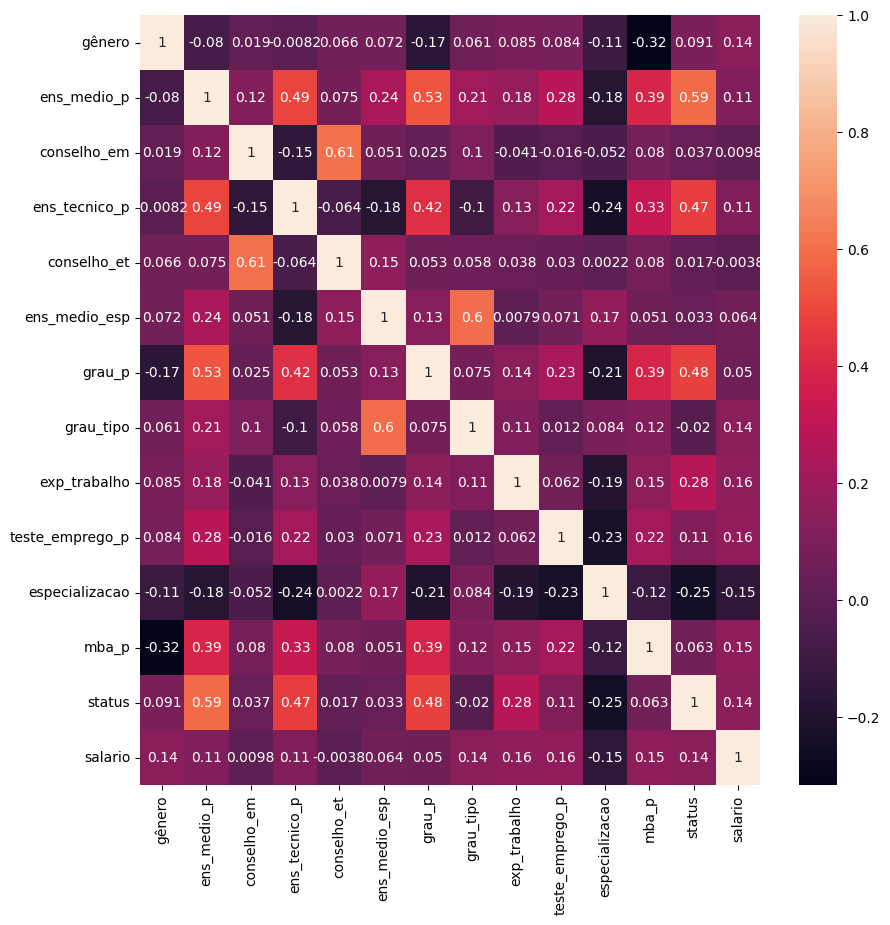

In [29]:
# Verificando a correlação dos dados
plt.figure(figsize=(10,10))
sns.heatmap(campus.corr(numeric_only = True), annot = True)

#### OBS: Neste caso, é possível observar que algumas variáveis apresentam uma correlação moderada ou forte, como o salário com o ensino médio técnico e a especialização com o grau de MBA. Além disso, há algumas correlações fracas, como entre o gênero e o conselho de ensino médio, e outras praticamente inexistentes, como entre o gênero e o ensino técnico.

#### No geral, é importante lembrar que a correlação não implica causalidade. Portanto, é necessário ser cauteloso na interpretação desses resultados e não assumir relações causais sem uma análise mais aprofundada.

### Modelagem dos Dados
##### Nesta etapa iremos iniciar a modelagem e predição por meio de Machine Learning.

In [30]:
x = campus.drop(['status'], axis=1)
y = campus['status']

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25 , random_state=40)


In [32]:
# Criando um objeto do tipo DecisionTreeClassifier
Classifier = DecisionTreeClassifier()

# Treinando o modelo com os dados de treino (x_train e y_train)
Classifier.fit(x_train, y_train)

# Fazendo a predição das classes para os dados de teste (x_test) utilizando o modelo treinado
y_pred = Classifier.predict(x_test)

# Gerando a matriz de confusão comparando as classes verdadeiras (y_test) com as classes preditas (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Imprimindo a matriz de confusão
print(cm)


[[16  0]
 [ 2 36]]


Essa matriz de confusão indica os resultados de um modelo de classificação binária que tenta prever duas classes: positiva e negativa. Os elementos da diagonal principal representam os acertos do modelo, enquanto os elementos fora da diagonal principal representam os erros.

Nesse caso específico, temos:

16 verdadeiros positivos (o modelo previu corretamente a classe positiva para 16 casos);
37 verdadeiros negativos (o modelo previu corretamente a classe negativa para 37 casos);
0 falsos negativos (o modelo previu incorretamente a classe negativa para 0 casos);
1 falso positivo (o modelo previu incorretamente a classe positiva para 1 caso).
Em resumo, podemos concluir que o modelo apresentou um bom desempenho na classificação das amostras, com apenas um erro na previsão da classe positiva.